### Implementing HDBSCAN to cluster spending habits of accounts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN, DBSCAN
import seaborn as sns

In [13]:
spending_data = pd.read_csv('C:/Users/camer/OneDrive/Documents/Data Science MSc/DSMP/Normalised_proportional_spending_by_account.csv')
spending_data.head()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,-0.823946,1.469060,-0.659479,-0.461756,-0.599109,2.363629,0.330532,-0.335033,0.547045,-0.395954,-0.655493,-0.593556,5.031022,-1.163425
1,1002.0,0.206617,2.090178,-0.695943,-0.214125,-0.708981,-0.202244,0.443402,-0.335033,3.472580,0.104802,-0.627263,-0.839066,-0.384490,-0.761329
2,1006.0,-0.141294,-0.598923,0.642122,1.045971,-0.745641,1.381723,-0.817788,-0.335033,0.901520,-0.395954,2.001449,-0.756300,-0.384490,-1.177781
3,1018.0,-0.435344,-1.410646,-0.611389,-0.639188,2.068229,-1.209232,0.391902,-0.335033,-0.652950,-0.395954,1.555709,2.145807,-0.099624,-0.763351
4,1053.0,0.785170,-0.434381,-0.695943,-0.552537,2.356540,-0.107351,1.214833,-0.053129,1.080736,-0.395954,-0.592384,0.945316,-0.384490,-0.998671


Splitting the data into features and targets

In [14]:
X = spending_data.drop('Sender account', axis=1, errors='ignore')

#### Performing dimensionality reduction (UMAP, PCA, t-SNE)

(8142, 2)


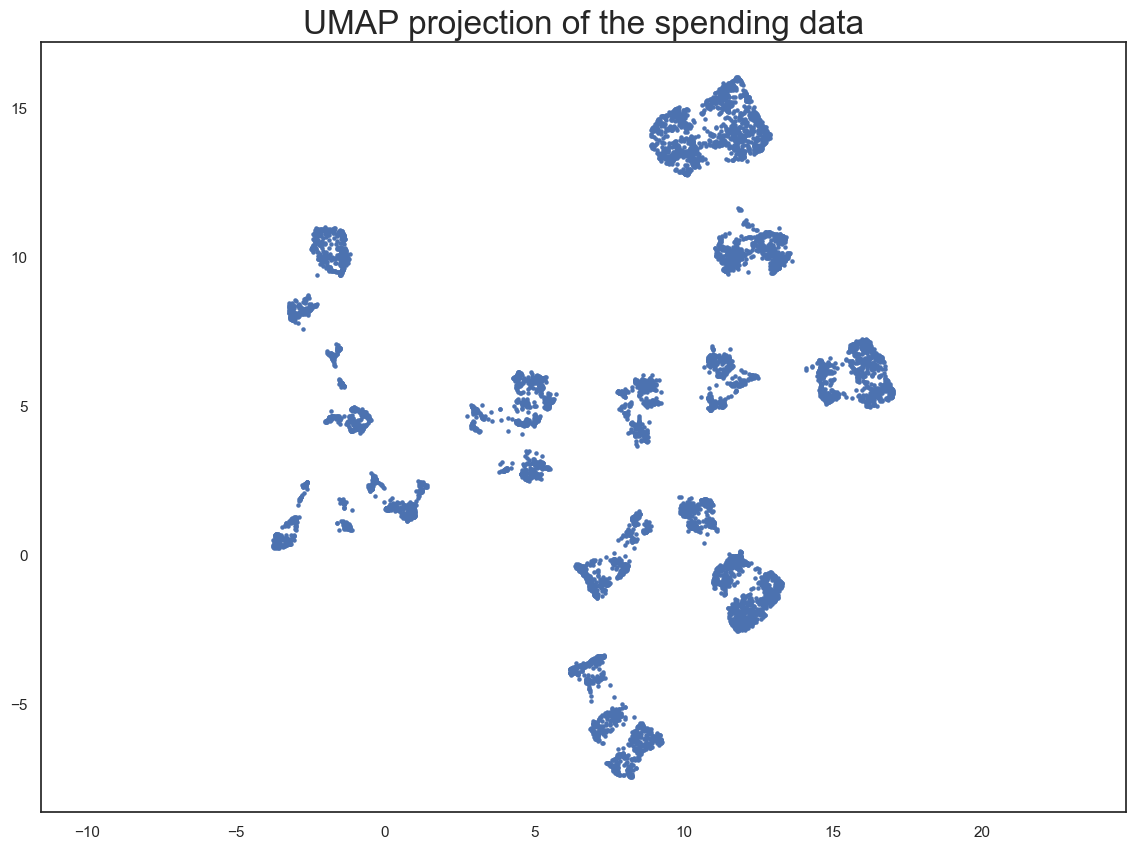

In [15]:
import umap
import matplotlib.pyplot as plt
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

umap_model = umap.UMAP()

spending_umap = umap_model.fit_transform(X)
print(spending_umap.shape)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spending data', fontsize=24);

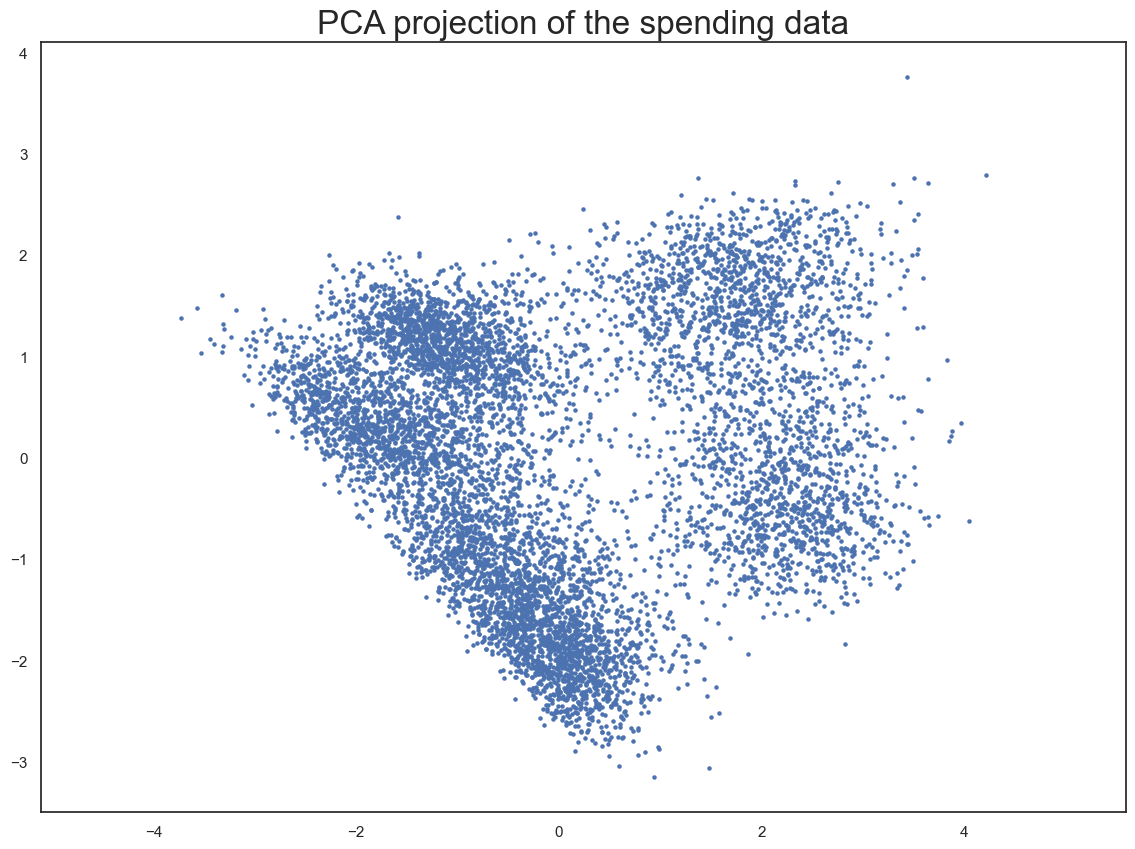

In [6]:
from sklearn.decomposition import PCA
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
pca = PCA()
spending_pca = pca.fit_transform(X)

plt.scatter(
    spending_pca[:, 0],
    spending_pca[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the spending data', fontsize=24);

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


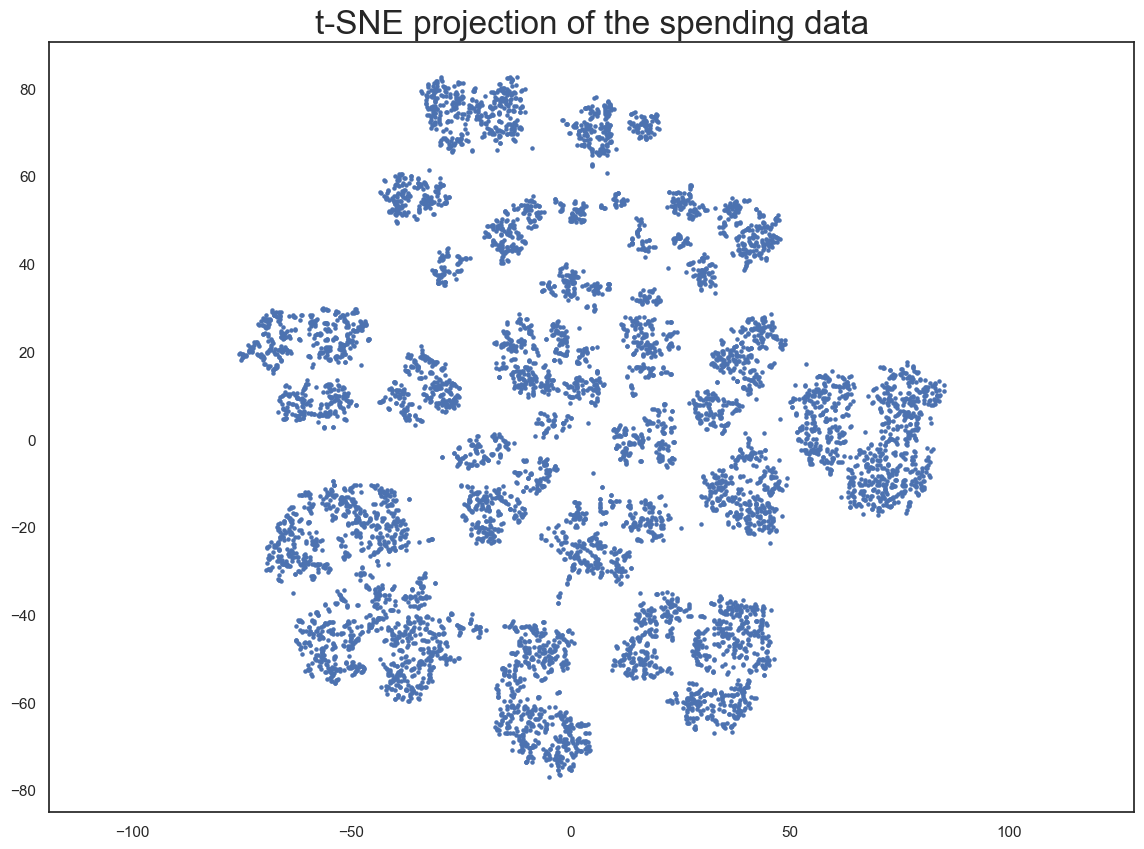

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE()
spending_tsne = tsne.fit_transform(X)

plt.scatter(
    spending_tsne[:, 0],
    spending_tsne[:, 1],
    s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of the spending data', fontsize=24)
plt.show()

#### Clustering with HDBSCAN on data after UMAP 

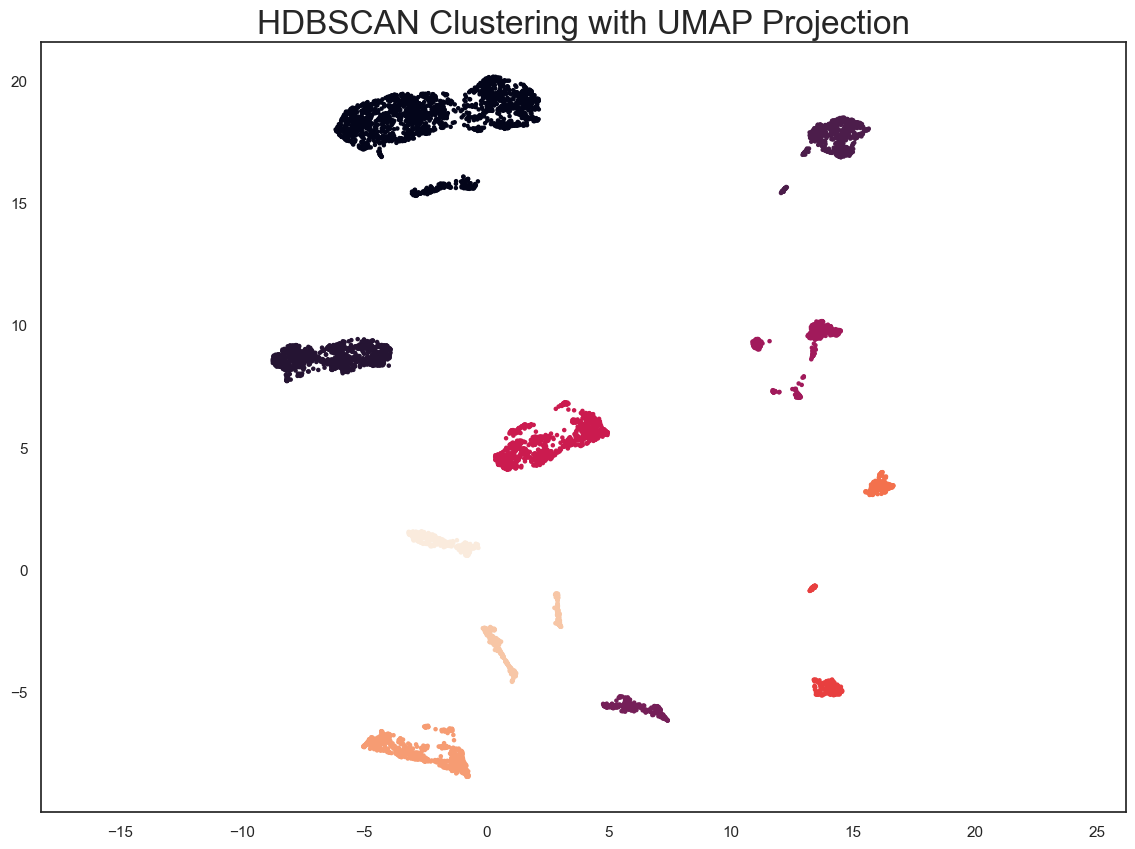

The average silhouette_score is : 0.73446375


In [126]:
from sklearn.metrics import silhouette_score

hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()

spending_data['cluster_label'].value_counts()

silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

### Implementing DBSCAN

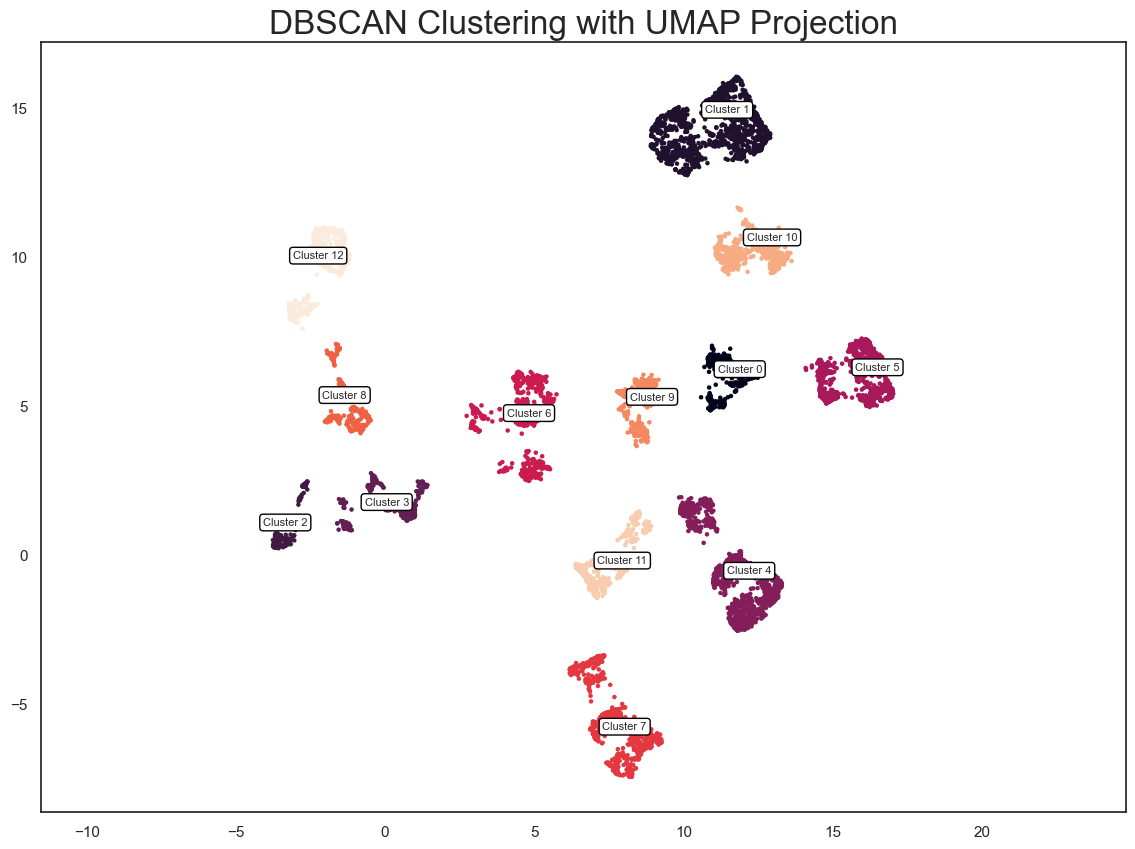

The average silhouette_score is : 0.6324241


In [17]:
from sklearn.metrics import silhouette_score

db = DBSCAN(min_samples=10, eps=1)

cluster_labels = db.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

for label in np.unique(cluster_labels):
    if label == -1:  # Label noise points separately
        continue
    cluster_center = np.mean(spending_umap[cluster_labels == label], axis=0)
    plt.annotate(
        f'Cluster {label}',
        xy=cluster_center,
        xytext=(cluster_center[0], cluster_center[1]),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()
spending_data['cluster_label'].value_counts()


silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

#### Plotting accounts within UMAP clusters

In [29]:
cluster_of_interest = 2

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=6)

sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
30197.0,-1.042051,-0.640377,1.280494,1.399083,-0.814413,1.605455,-0.821000,-0.335033,-0.215941,-0.395954,1.371061,-0.680663,-0.384490,-0.857065,2
74536.0,-0.437528,-0.099642,1.645603,-0.624223,-0.655796,1.738228,-0.262978,-0.335033,-0.044243,-0.395954,1.525319,-0.750806,-0.050573,-0.837168,2
58922.0,-1.042051,-0.374418,-0.695943,-0.731424,-0.356642,2.229130,-0.220797,-0.335033,-1.110241,-0.395954,1.985492,-0.662895,-0.095825,-0.696008,2
56851.0,-0.846815,-0.309686,-0.655142,1.436081,-0.044603,1.469226,-1.339586,-0.228295,0.052822,-0.395954,1.658445,-0.703188,-0.384490,-1.161836,2
45745.0,-0.294233,-0.187023,-0.602153,-0.731424,0.092036,2.000803,-0.627260,0.010012,0.139648,-0.395954,1.854700,-0.839066,-0.384490,-0.978470,2
12378.0,-0.678170,-0.414098,-0.695943,-0.644211,-0.814413,1.748351,-0.118219,-0.335033,0.094173,-0.395954,2.388627,-0.363161,-0.384490,-0.865932,2


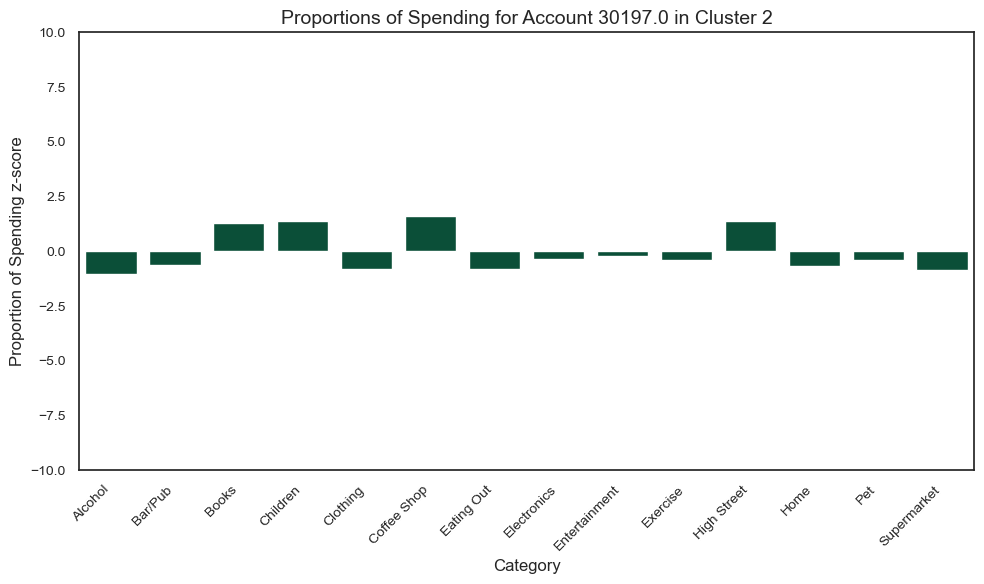

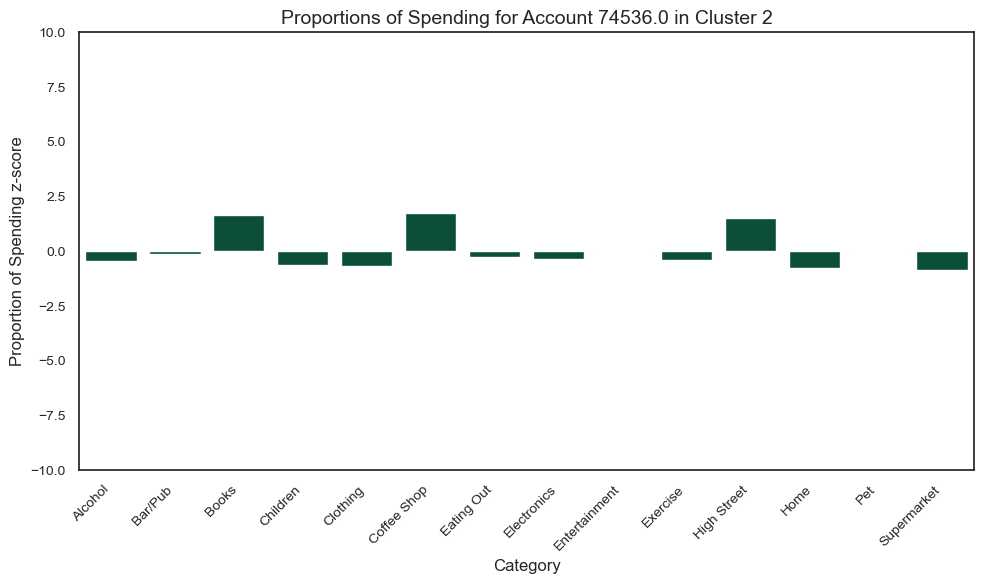

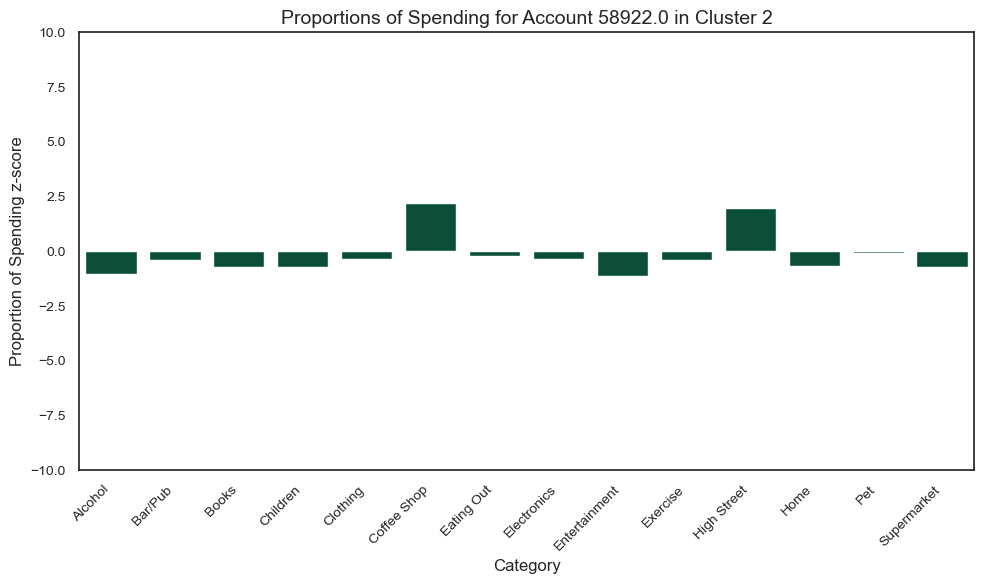

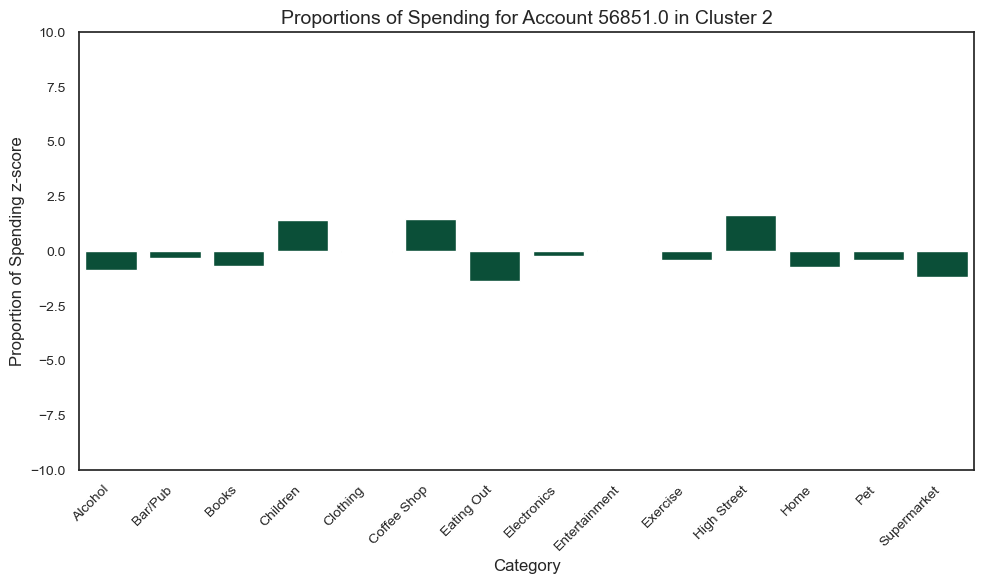

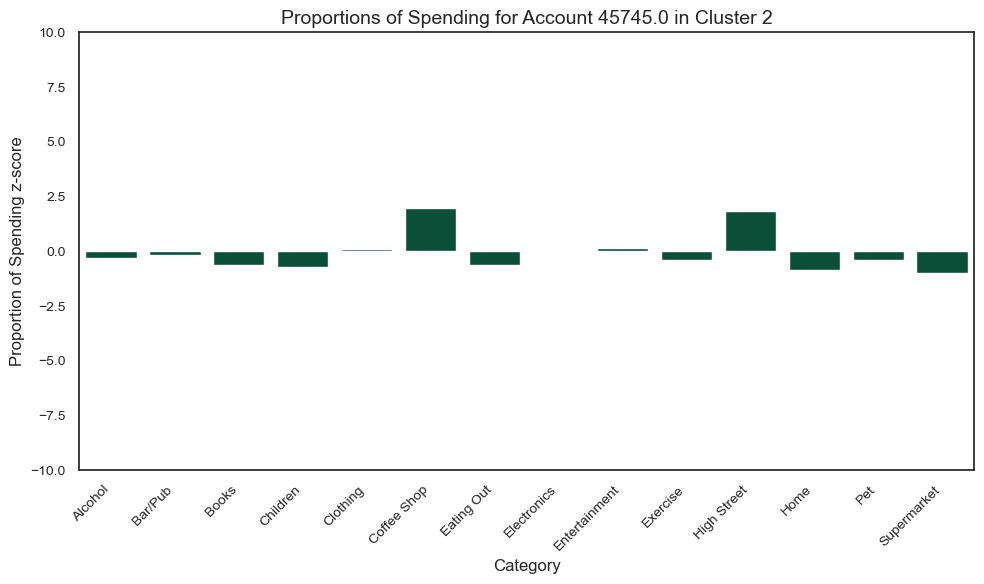

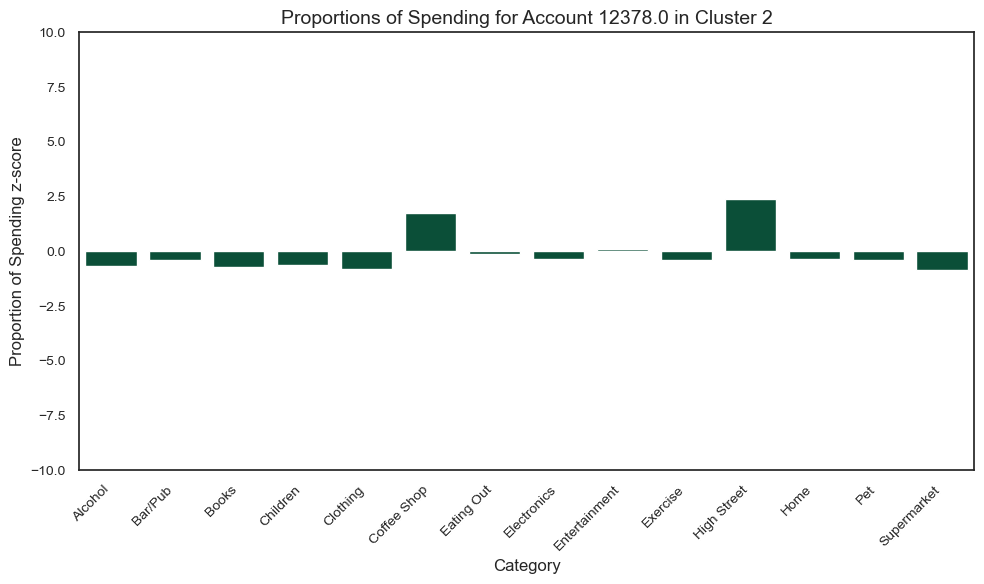

In [31]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending z-score', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-10, 10)
    plt.tight_layout()
    plt.show()

Labelling clusters with insights

In [129]:
cluster_names = [
    'High Coffee Low Clothing Low High-Street',
    'High Bar/Pub',
    'Low Supermarket High Highstreet High Children',
    'Low Supermarket High Highstreet',
    'High Clothing High Home',
    'High Children',
    'High Clothing High Coffeeshop',
    'Low Supermarket High Highstreet High Bar/Pub',
    'High Clothing High Children Low Bar/Pub',
    'Low Supermarket High Highstreet High Coffeshop',
    'High Children High Coffeeshop',
    'Low Supermarket High Highstreet High Coffeshop High Clothing'
]

In [130]:
spending_data['cluster_name'] = spending_data['cluster_label'].apply(lambda x: cluster_names[x])

In [131]:
spending_data

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label,cluster_name
0,1000.0,-0.003603,0.115157,-0.013799,-0.026129,-0.038480,0.124927,0.015093,-0.007146,0.012463,-0.009759,-0.051889,-0.021443,0.046869,-0.142262,0,High Coffee Low Clothing Low High-Street
1,1002.0,0.000903,0.163846,-0.014562,-0.012116,-0.045537,-0.010689,0.020247,-0.007146,0.079114,0.002583,-0.049655,-0.030313,-0.003582,-0.093094,1,High Bar/Pub
2,1006.0,-0.000618,-0.046949,0.013436,0.059187,-0.047891,0.073030,-0.037343,-0.007146,0.020539,-0.009759,0.158437,-0.027322,-0.003582,-0.144018,2,Low Supermarket High Highstreet High Children
3,1018.0,-0.001904,-0.110578,-0.012793,-0.036169,0.132839,-0.063913,0.017895,-0.007146,-0.014876,-0.009759,0.123151,0.077521,-0.000928,-0.093342,3,Low Supermarket High Highstreet
4,1053.0,0.003433,-0.034050,-0.014562,-0.031265,0.151357,-0.005674,0.055473,-0.001133,0.024622,-0.009759,-0.046894,0.034151,-0.003582,-0.122116,4,High Clothing High Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,0.011549,0.030034,0.008183,-0.030112,-0.032141,-0.021946,-0.054128,0.003808,0.055777,0.094429,0.105711,-0.030313,-0.003582,-0.137269,7,Low Supermarket High Highstreet High Bar/Pub
8138,100934.0,0.002399,-0.008018,0.023774,-0.041388,-0.037877,-0.022543,-0.034243,-0.007146,-0.005143,-0.009759,-0.050436,-0.021802,-0.003582,0.215763,1,High Bar/Pub
8139,100947.0,-0.000180,-0.026472,0.016903,-0.033881,-0.044114,-0.019262,0.023038,0.010119,0.002325,-0.004129,-0.045862,-0.024182,-0.003582,0.149280,1,High Bar/Pub
8140,100986.0,0.000495,0.054343,-0.011798,-0.041388,0.001236,-0.061682,-0.006057,-0.007146,0.008079,0.050735,-0.051495,-0.030313,-0.002792,0.097780,1,High Bar/Pub


In [ ]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [12]:
spending_data['Alcohol'].min()

-0.00455653712913

In [28]:
spending_data['cluster_label'].value_counts()

cluster_label
1     1241
4     1172
7      802
6      769
5      762
10     580
12     566
11     515
3      433
0      371
9      349
8      343
2      239
Name: count, dtype: int64

#### Clustering without UMAP

In [26]:
hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(X)

spending_data['cluster_label'] = cluster_labels

In [6]:
spending_data['cluster_label'].unique()

array([ 0,  1, -1,  2,  3], dtype=int64)

Plotting the proportions for some of the accounts in a cluster

In [17]:
cluster_of_interest = 1

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=3)


In [18]:
sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
94358.0,-0.000747,-0.008759,0.018492,-0.037576,-0.048705,-0.027612,0.012461,-0.007146,0.006228,-0.009759,-0.049464,-0.022343,-0.003582,0.178512,1
92468.0,-0.003344,0.111188,0.040096,-0.029668,-0.015230,0.014609,0.006478,-0.007146,-0.026818,-0.009759,-0.047388,-0.030313,-0.003582,0.000877,1
66821.0,-0.003712,0.032756,-0.008229,-0.030917,-0.041415,-0.007324,-0.044276,-0.007146,0.001292,-0.009759,-0.042140,-0.026766,0.021583,0.166053,1


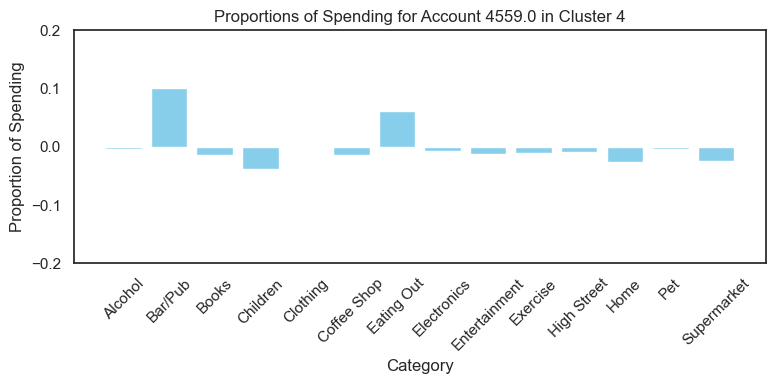

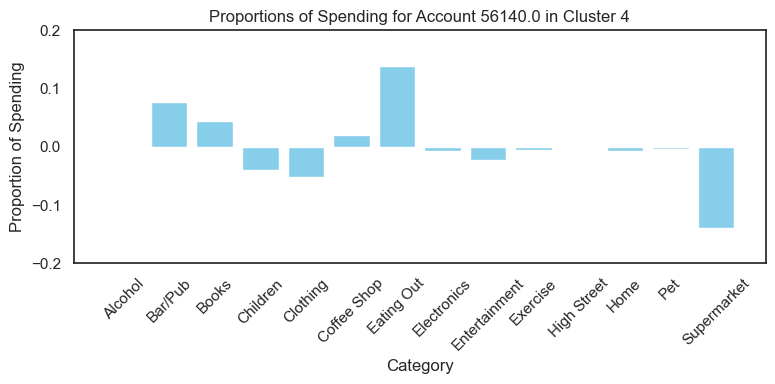

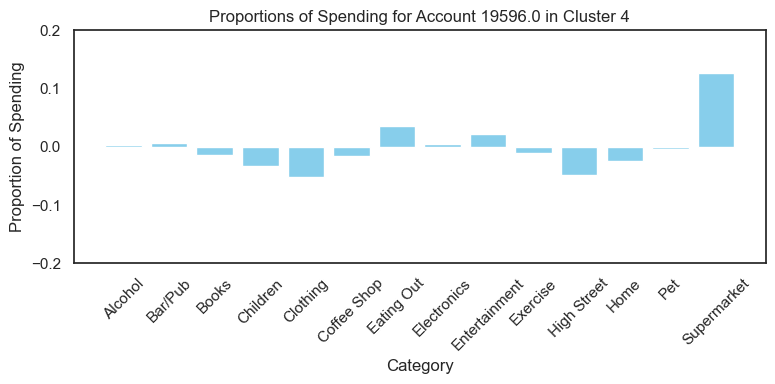

In [62]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

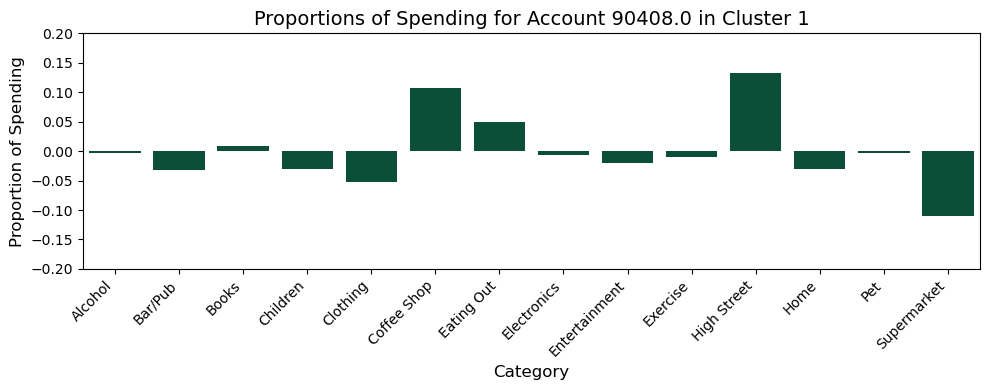

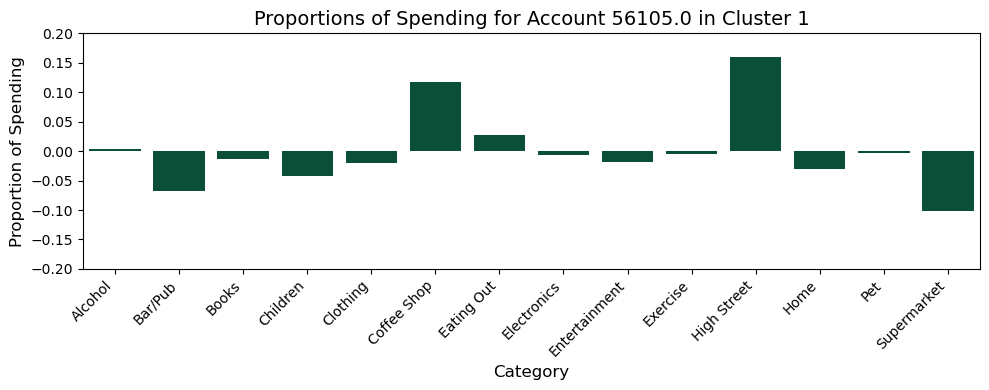

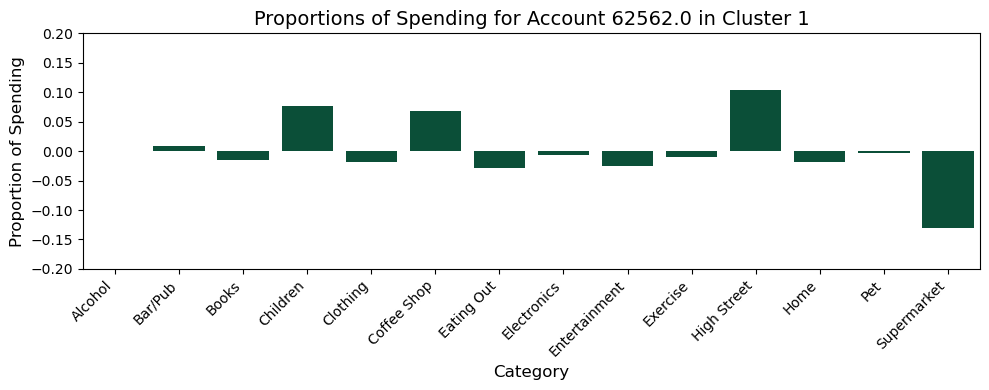

In [20]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-0.2, 0.2)  # Adjust y-axis limits if needed
    plt.tight_layout()
    plt.show()

In [26]:
spending_data['cluster_label'].value_counts()

cluster_label
 0    6292
 3     635
-1     533
 1     412
 2     270
Name: count, dtype: int64